In [1]:
import numpy as np , pandas as pd , matplotlib.pyplot as plt 



In [10]:
df = pd.read_csv(r'D:\This Project\Placement_2025\Yours_Gpay\src\artifacts\artifacts\validated_transactions.csv')


# rename column for simplicity 
df = df.rename( {"amounts ( in ₹ )" : "amount"  } ,axis=1 )

df.head(6)




,amount,merchants,Acc No.,Date,Time,Status
0,12.0,GANESH KUMAR YADAV,9582,2025-08-19,17:27:35,Completed
1,110.0,RAVI PRAKASH SO JAWAHIR,9582,2025-08-19,11:33:30,Completed
2,20.0,Roop Sagar Foodworks and Technologies LLP Banaras,9582,2025-08-18,21:15:06,Completed
3,12.0,GANESH KUMAR YADAV,9582,2025-08-18,18:22:25,Completed
4,7.0,GANESH KUMAR YADAV,9582,2025-08-17,17:25:01,Completed
5,96.0,Ramanujan Hostel,9582,2025-08-16,21:18:18,Completed


In [11]:

# sort by  date 
df = df.sort_values( by="Date" , ascending = False )
# df = df.reset_index()
df.head(10)

,amount,merchants,Acc No.,Date,Time,Status
15,10.00,Vivek Kumar Singh,9582,2025-08-29,17:00:44,Completed
12,2.00,Google Play,9582,2025-08-29,23:11:45,Completed
13,2.00,Google Play,9582,2025-08-29,23:10:52,Completed
14,132.05,Zomato,9582,2025-08-29,20:25:28,Completed
17,296.00,GROFERS INDIA PRIVATE LIMITED,9582,2025-08-28,17:25:24,Completed
16,694.00,Blinkit,9582,2025-08-28,18:47:38,Completed
18,10.00,AJAY KUMAR SO SEVA L,9582,2025-08-27,17:16:05,Completed
20,161.00,Airtel,9582,2025-08-26,15:56:34,Completed
19,30.00,Vivek Kumar Singh,9582,2025-08-26,17:45:45,Completed
22,38.00,Bajrang drawing emporium,9582,2025-08-25,09:52:20,Completed


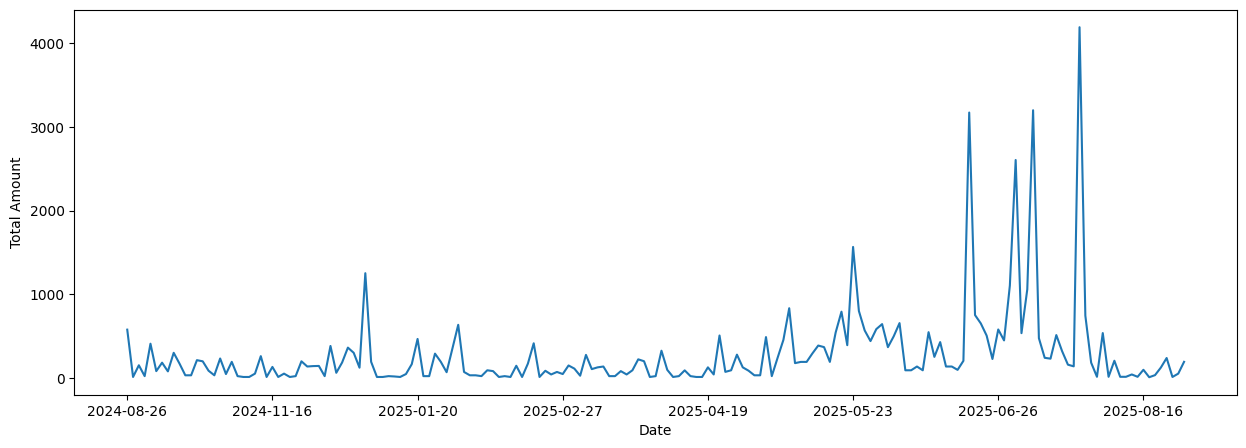

In [93]:


def plot_spend_date( df   ,date_col , amount_col , start_date , end_date ) :
    df1 = df[ (df[date_col]>=start_date) & (df[date_col]<=end_date) ]

    df_spends = df1.groupby( date_col )[amount_col ].sum()
    plt.figure( figsize = ( 15 , 5 ))
    df_spends.plot( xlabel='Date' , ylabel='Total Amount')
    

plot_spend_date( df , "Date" , "amount" , '2024-08-26'	 , '2025-08-26'	)


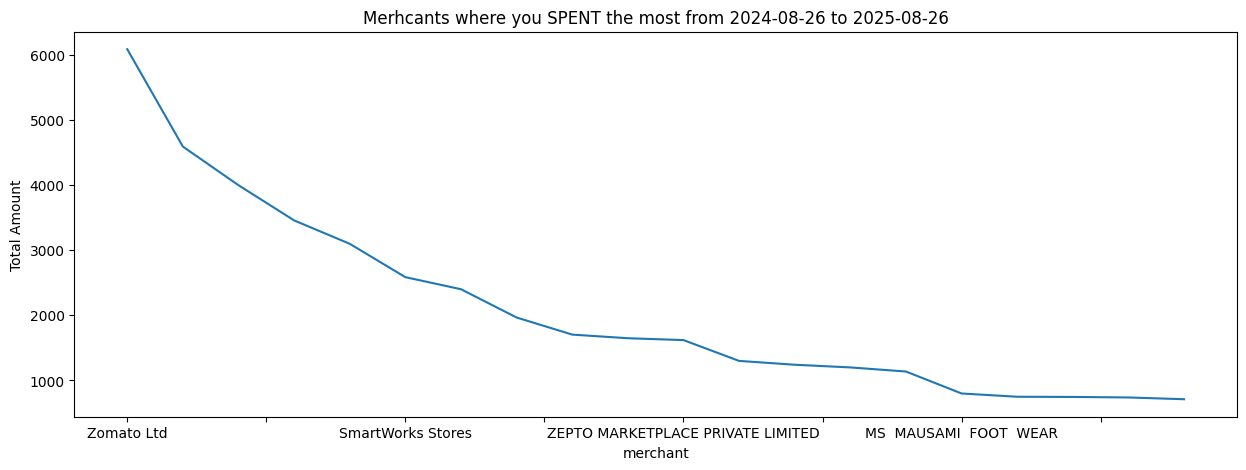

In [94]:

# the top K merhcants where we spedn te MOST in alst few days 

def plot_spend_merchant( df   ,date_col , merchant_col ,amount_col , top_K_merchants ,  start_date , end_date ) :
    # use & isntea dof and for series compaon 
    df1 = df[ (df[date_col]>=start_date) & (df[date_col]<=end_date) ]

    df_spends = df1.groupby( merchant_col )[amount_col ].sum() # new df after grouping 
    # sort them and pcik top K 
    df_spends1  = df_spends.sort_values(  ascending =False )[: top_K_merchants  ]

    
    plt.figure( figsize = ( 15 , 5 ))
    df_spends1.plot( title = f'Merhcants where you SPENT the most from {start_date} to {end_date}' , xlabel='merchant' , ylabel='Total Amount')
    

plot_spend_merchant( df , "Date" , "merchants" , "amount" , 20 , '2024-08-26'	 , '2025-08-26'	)



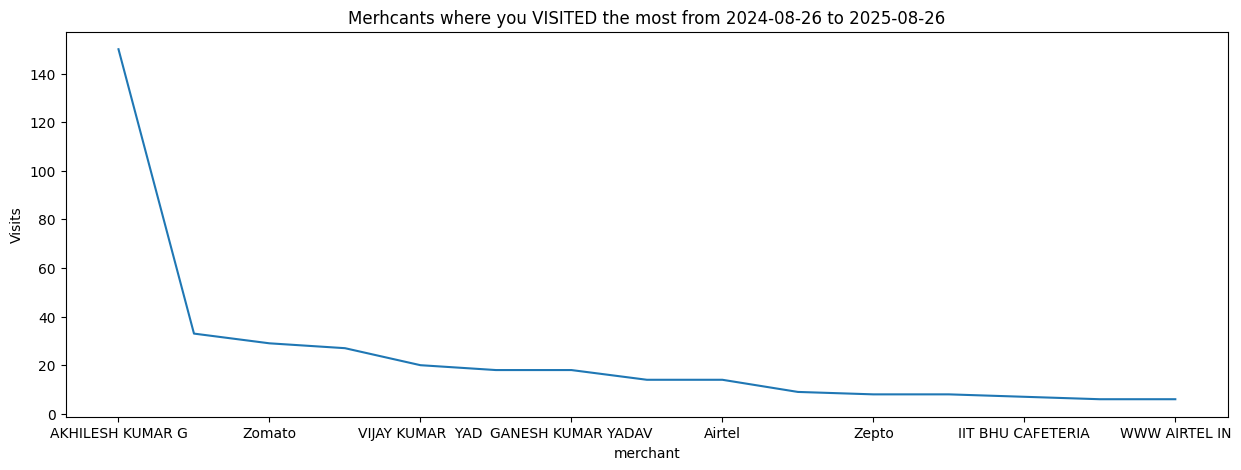

In [54]:

# the top K merhcants where we spedn te MOST in alst few days 

def plot_vists( df   ,date_col , merchant_col ,amount_col , top_K_merchants ,  start_date , end_date ) :
    # use & isntea dof and for series compaon 
    df1 = df[ (df[date_col]>=start_date) & (df[date_col]<=end_date) ]

    df_visits = df1.groupby( merchant_col )[amount_col].count() # new df after grouping 
    # sort them and pcik top K 
    df_visits1  = df_visits.sort_values(ascending =False )[: top_K_merchants  ]

    
    plt.figure( figsize = ( 15 , 5 ))
    df_visits1.plot( title = f'Merhcants where you VISITED the most from {start_date} to {end_date}' , xlabel='merchant' , ylabel='Visits')
    

plot_vists( df , "Date" , "merchants" , "amount" , 15 , '2024-08-26'	 , '2025-08-26'	)



In [61]:




def time( txt ) :
        
    lst = txt.split(":")
    hr  = int( lst[0])
    if ( hr >=0 and hr <=8) : 
                    
                    return 1 
    elif  ( hr >=8 and hr<=15) :
                    return 2 

    elif ( hr>=15 and hr<=20 ) :
                    return 3 
    else : 
                    return 4 

def time_frame( quarter) : 
        
        if quarter==1 : 
                return 'Early Morning'
        elif quarter==2 : 
                return 'Morning/Noon'
        elif quarter==3: 
                return 'Evening'
        else : 
                return 'Night'
                
        
df["Quarter"] = df["Time"].apply( time )
df["Quarter_means"] = df["Quarter"].apply( time_frame )



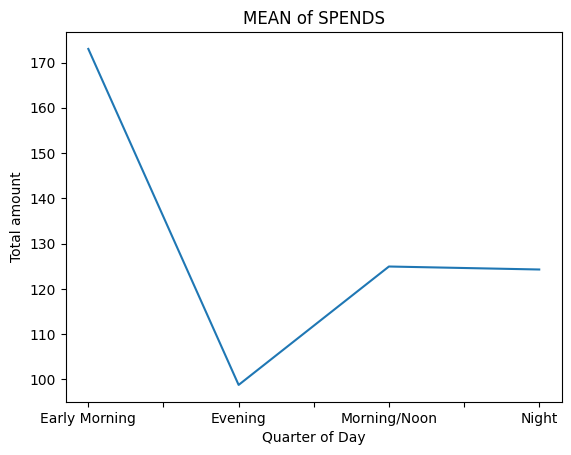

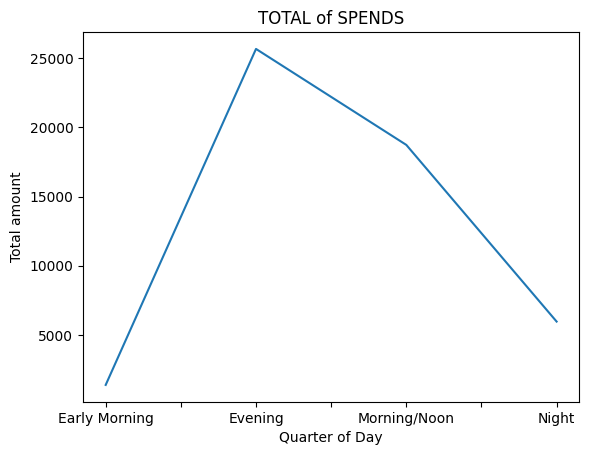

' Interestin g , mean of spedn is HIGHTST ealy mornign for me but HIGHEST AMOUTN TIL now i spent t evenings '

In [81]:
def plot_quarter( df , quarter , amount_col  , date_col ,start_date ,end_date ) : 
    df1 = df[ ( df[date_col]>=start_date) & (df[date_col]<=end_date )]
    df_quarter_mean = df1.groupby( quarter )[ amount_col ].mean()
    df_quarter_sum = df1.groupby( quarter )[ amount_col ].sum()

    df_quarter_mean.plot( title="MEAN of SPENDS" , xlabel = "Quarter of Day" , ylabel = "Total amount")
    plt.show()
    df_quarter_sum.plot( title="TOTAL of SPENDS" , xlabel = "Quarter of Day" , ylabel = "Total amount")
    plt.show()

plot_quarter( df , "Quarter_means" , "amount" , "Date" ,'2024-08-26', '2025-08-26' )

''' Interestin g , mean of spedn is HIGHTST ealy mornign for me but HIGHEST AMOUTN TIL now i spent t evenings '''

Text(0.5, 1.0, 'COmpled V/S Failed Trnactions ')

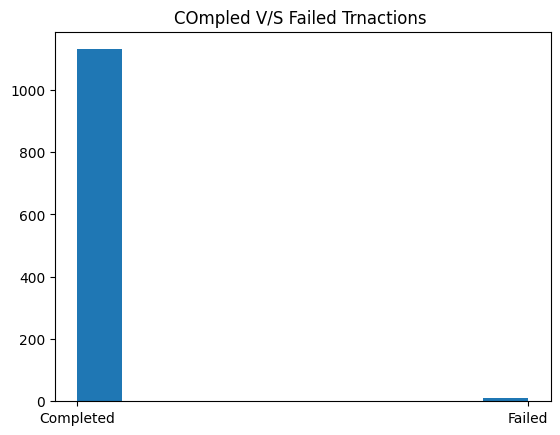

In [85]:
# ratio of competed and uncompeted trnasctions 

plt.hist( df["Status"])
plt.title("COmpled V/S Failed Trnactions ")

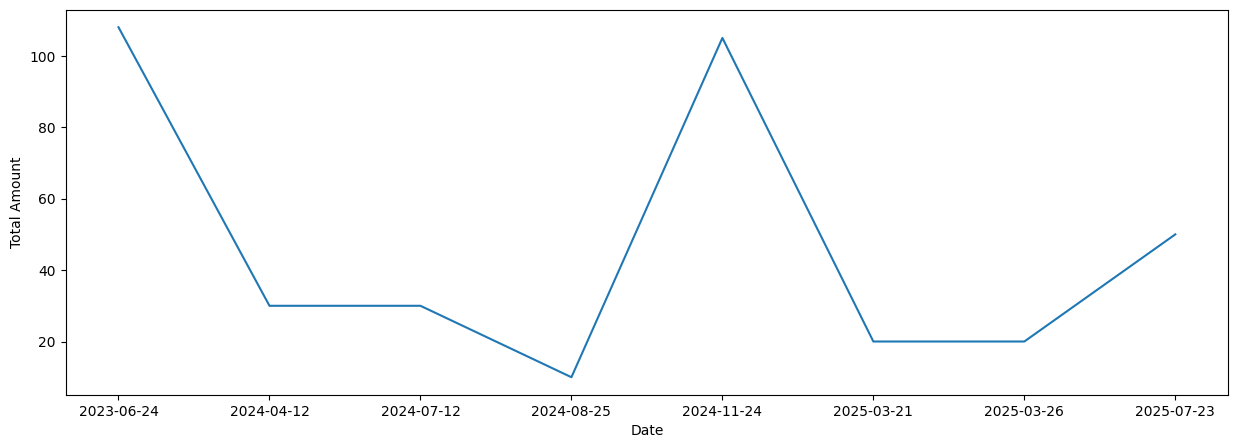

In [95]:
''' 
Analyzing the Failed Tranactions 
'''
df_fail = df[ df["Status"]=='Failed']

# plot_quarter( df_fail , "Quarter_means" , "amount" , "Date" ,df_fail["Date"].min(), df_fail["Date"].max() )

# merhcnats where we have sufferd the MOST failure Rate 
# plot_vists( df_fail , "Date" , "merchants" , "amount" , len( df_fail['merchants'].unique()) , df_fail["Date"].min(), df_fail["Date"].max()	)


plot_spend_date( df_fail , "Date" , "amount" ,  df_fail["Date"].min(), df_fail["Date"].max())


In [100]:
''' SMART SPENDING CATEGORIES '''

from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer( stop_words= 'english')

X = tf_idf.fit_transform( df["merchants"])

In [103]:
from sklearn.cluster import KMeans 
kmeans = KMeans( n_clusters= 5 )
kmeans.fit(X )


,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [106]:
df["spending_cat"] = kmeans.labels_

In [107]:
df

,amount,merchants,Acc No.,Date,Time,Status,Quarter,Quarter_means,spending_cat
15,10.00,Vivek Kumar Singh,9582,2025-08-29,17:00:44,Completed,3,Evening,0
12,2.00,Google Play,9582,2025-08-29,23:11:45,Completed,4,Night,0
13,2.00,Google Play,9582,2025-08-29,23:10:52,Completed,4,Night,0
14,132.05,Zomato,9582,2025-08-29,20:25:28,Completed,3,Evening,1
17,296.00,GROFERS INDIA PRIVATE LIMITED,9582,2025-08-28,17:25:24,Completed,3,Evening,0
...,...,...,...,...,...,...,...,...,...
1137,7.00,Mr ANIL KUMAR,7922,2022-08-21,18:22:27,Completed,3,Evening,3
1138,37.00,Mr ANIL KUMAR,7922,2022-08-15,16:40:54,Completed,3,Evening,3
1139,60.00,SPARDHA IIT BHU,7922,2022-08-12,20:13:30,Completed,3,Evening,0
1140,220.00,Mom's Magic,7922,2022-07-26,20:09:06,Completed,3,Evening,0


In [ ]:
import numpy as np

def get_top_terms(model, vectorizer, n_top_words):
    feature_names = vectorizer.get_feature_names_out()
    cluster_centers = model.cluster_centers_.argsort()[:, ::-1]

    for i in range(model.n_clusters):
        top_terms = [feature_names[j] for j in cluster_centers[i, :n_top_words]]
        print(f"Cluster {i}: {' '.join(top_terms)}")

# Let's find the top 5 words for each cluster
get_top_terms(kmeans , tf_idf , 5)

''' The merchants inSAME clsuter , the usr shows SAME spending HABits can be sued in ADS '''

Cluster 0: yadav santlal singh kumar prasad
Cluster 1: zomato limited zepto zeptonow yad
Cluster 2: stores smartworks zomato zeptonow yad
Cluster 3: kumar akhilesh anil mr yad
Cluster 4: airtel limited bharti prepaid payments


In [110]:
import pandas as pd

# Assuming your DataFrame is loaded as 'df'
# Replace 'Vivek Kumar Singh' with the merchant you want to analyze
merchant_name = 'Vivek Kumar Singh'
merchant_df = df[df['merchants'] == merchant_name].copy()

# Ensure the 'Date' column is a proper datetime object
merchant_df['Date'] = pd.to_datetime(merchant_df['Date'])

# Sort the data by date to create a proper time series
merchant_df = merchant_df.sort_values(by='Date')
# Set the 'Date' column as the index
merchant_df.set_index('Date', inplace=True)

# Resample the data to a daily frequency, summing the amounts for each day
daily_transactions = merchant_df['amount'].resample('D').sum()

# Fill any days with no transactions with a value of 0
daily_transactions = daily_transactions.fillna(0)

print(daily_transactions.head())

from prophet import Prophet

# Prophet requires a specific format: 'ds' for the date, and 'y' for the value
prophet_df = daily_transactions.reset_index()
prophet_df.rename(columns={'Date': 'ds', 'amount': 'y'}, inplace=True)

# Create a Prophet model instance
model = Prophet()

# Fit the model to your data
model.fit(prophet_df)

# Create a future DataFrame to hold the dates for which you want to predict
future = model.make_future_dataframe(periods=30) # Predict for the next 30 days

# Make the predictions
forecast = model.predict(future)

# Print the forecast for the next few days
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

Date
2025-08-13    40.0
2025-08-14     0.0
2025-08-15     0.0
2025-08-16     0.0
2025-08-17     0.0
Freq: D, Name: amount, dtype: float64


d:\ML\this\envs\finance\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
13:00:32 - cmdstanpy - INFO - Chain [1] start processing
13:00:33 - cmdstanpy - INFO - Chain [1] done processing


           ds      yhat  yhat_lower  yhat_upper
42 2025-09-24  7.109838   -5.336776   20.281278
43 2025-09-25 -6.224549  -18.910368    6.491446
44 2025-09-26  3.776750   -8.837266   16.634716
45 2025-09-27 -6.847179  -20.542679    6.068844
46 2025-09-28 -1.846572  -14.882637    9.933025
